In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

In [7]:
summaries_dir = '../csv/'

In [ ]:
# for file in data:
#     df = pd.read_csv(file)
#     grad_steps = df['gradient_step']
#     rewards = df['episode_reward']
#     survival_time = df['episode_length']
#     plt.plot(grad_steps, rewards, marker='o', linestyle='-')
#     plt.xlabel('Environment Step')
#     plt.ylabel('Reward Value')
#     plt.title(f'Energy of agent {id} after {round_count} rounds')
#     plt.show()

#     plt.plot(grad_steps, survival_time, marker='o', linestyle='-')
#     plt.xlabel('Environment Step')
#     plt.ylabel('Reward Value')
#     plt.title(f'Energy of agent {id} after {round_count} rounds')
#     plt.show()



In [12]:
roadrunner_audio_eval = summaries_dir + "road_runner_audio_please_3/eval_log.csv"
roadrunner_no_audio_eval = summaries_dir + "road_runner_no_audio_please_3/eval_log.csv"

roadrunner_audio_df = pd.read_csv(roadrunner_audio_eval)
roadrunner_no_audio_df = pd.read_csv(roadrunner_no_audio_eval)

roadrunner_audio_df["environment_step"] = roadrunner_audio_df["gradient_step"]/2 + 2000
roadrunner_no_audio_df["environment_step"] = roadrunner_no_audio_df["gradient_step"]/2 + 2000

roadrunner_audio_df

,environment_step,gradient_step,num_train_episodes,mean_episode_reward,mean_episode_length
0,5000.0,6000,28,660.0,3886.4
1,10000.0,16000,36,100.0,357.2
2,15000.0,26000,43,3840.0,928.0
3,20000.0,36000,51,920.0,608.0
4,25000.0,46000,75,1100.0,837.4
5,30000.0,56000,81,5020.0,884.8
6,35000.0,66000,86,440.0,2953.4
7,40000.0,76000,93,1580.0,726.2
8,45000.0,86000,118,600.0,629.8
9,50000.0,96000,123,2340.0,939.2


In [13]:
roadrunner_no_audio_df

,environment_step,gradient_step,num_train_episodes,mean_episode_reward,mean_episode_length
0,5000.0,6000,26,2360.0,627.0
1,10000.0,16000,40,940.0,1014.0
2,15000.0,26000,45,2700.0,1207.2
3,20000.0,36000,49,1500.0,969.2
4,25000.0,46000,71,0.0,264.0
5,30000.0,56000,79,2440.0,846.8
6,35000.0,66000,85,4180.0,864.2
7,40000.0,76000,91,4680.0,938.6
8,45000.0,86000,114,900.0,368.0
9,50000.0,96000,121,4220.0,1006.0


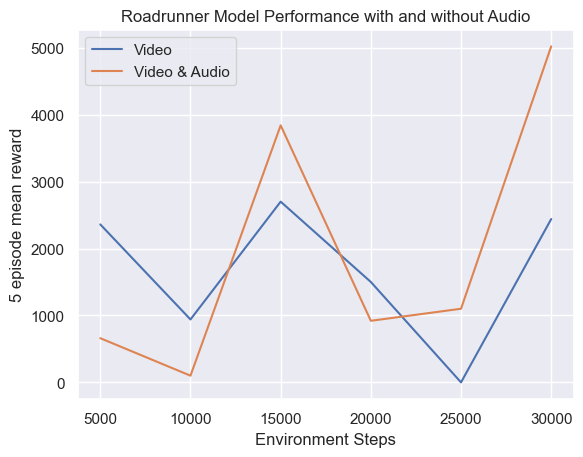

In [26]:
roadrunner_no_audio_df = roadrunner_no_audio_df[roadrunner_no_audio_df["environment_step"] <= 30000]
roadrunner_audio_df = roadrunner_audio_df[roadrunner_audio_df["environment_step"] <= 30000]

data = {
    "environment_step": roadrunner_no_audio_df["environment_step"],
    "audio": roadrunner_audio_df["mean_episode_reward"],
    "base": roadrunner_no_audio_df["mean_episode_reward"],
}

df = pd.DataFrame(data)
# window_size = 3
# df['audio_ma'] = df['audio'].rolling(window=window_size).mean()
# df['base_ma'] = df['base'].rolling(window=window_size).mean()

sns.lineplot(data=df, x='environment_step', y='base', label='Video')
sns.lineplot(data=df, x='environment_step', y='audio', label='Video & Audio')
plt.title("Roadrunner Model Performance with and without Audio")
plt.xlabel("Environment Steps")
plt.ylabel("5 episode mean reward")
plt.legend()
plt.savefig("../figures/audio_comparision.png", bbox_inches=0)
plt.show()